# Baseline and ELMO Notebook:
team members: Ajinkya, Hemani, Rohit, Shibani</br>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import statistics as st
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# reading data
data = pd.read_json('/content/gdrive/MyDrive/AI-3/Project/fgrezes:WIESP2022-NER/WIESP2022-NER-TRAINING.jsonl', lines=True)
tags = pd.read_json('/content/gdrive/MyDrive/AI-3/Project/fgrezes:WIESP2022-NER/ner_tags.json', lines=True)

In [4]:
# structuring tags
tags = tags.T.reset_index()
tags.head(10)

,index,0
0,B-Archive,0
1,B-CelestialObject,1
2,B-CelestialObjectRegion,2
3,B-CelestialRegion,3
4,B-Citation,4
5,B-Collaboration,5
6,B-ComputingFacility,6
7,B-Database,7
8,B-Dataset,8
9,B-EntityOfFutureInterest,9


In [5]:
# splitting the data
train_data, test_data = train_test_split(data, train_size=0.8, random_state=1)

In [6]:
# seeing the train data
train_data.head()

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
1092,2021ApJ...913..130H,609,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",fulltext,"[simulation, results, revealed, a, variation, ...",fulltext_609_2021ApJ...913..130H
19,2017ApJ...834...89D,484,"[62, 62, 62, 62, 62, 21, 62, 21, 62, 21, 62, 1...","[O, O, O, O, O, B-Organization, O, B-Organizat...",acknowledgments,"[This, work, was, supported, by, INFN, and, AS...",acknowledgments_484_2017ApJ...834...89D
573,2017ApJ...834...15H,493,"[62, 62, 22, 53, 62, 22, 53, 53, 62, 62, 62, 6...","[O, O, B-Person, I-Person, O, B-Person, I-Pers...",acknowledgments,"[We, thank, Jo, Bovy, and, Timothy, D., Brandt...",acknowledgments_493_2017ApJ...834...15H
948,2016A&A...586A.135P,236,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, B-Telesco...",fulltext,"[magnetic, field, and, the, brightness, ridges...",fulltext_236_2016A&A...586A.135P
1424,2018ApJ...864L...9Y,405,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 24, 55, 6...","[O, O, O, O, O, O, O, O, O, B-Software, I-Soft...",fulltext,"[May, 2, (chosen, arbitrarily), and, are, inte...",fulltext_405_2018ApJ...864L...9Y


In [7]:
length_of_tokens = [len(i) for i in train_data.tokens]
print("The length of tokens can range from : ",min(length_of_tokens)," to ",max(length_of_tokens))
print("The mean of length of tokens is : ", round(np.mean(length_of_tokens),4))
print("The median of length of tokens is : ", round(np.median(length_of_tokens),4))
print("The mode of length of tokens is : ", round(st.mode(length_of_tokens),4))
print("The number of tokens in training data",len(train_data.tokens))

The length of tokens can range from :  7  to  795
The mean of length of tokens is :  324.1049
The median of length of tokens is :  463.5
The mode of length of tokens is :  518
The number of tokens in training data 1402


In [8]:
# Having a quick look at a record in  the train data
print(train_data.loc[19])
" ".join(train_data.tokens[19])

bibcode                                          2017ApJ...834...89D
label_studio_id                                                  484
ner_ids            [62, 62, 62, 62, 62, 21, 62, 21, 62, 21, 62, 1...
ner_tags           [O, O, O, O, O, B-Organization, O, B-Organizat...
section                                              acknowledgments
tokens             [This, work, was, supported, by, INFN, and, AS...
unique_id                    acknowledgments_484_2017ApJ...834...89D
Name: 19, dtype: object


'This work was supported by INFN and ASI under ASI-INFN Agreement No.2014-037-R.0. M.S.P. and E.E.V. acknowledge partial financial support from the the South African National Research Foundation (NRF) under their Research Cooperation Programme. E.E.V. thanks the Space Science Division of the South African Space Agency (SANSA) for partial financial support during his PhD studies. R.M. acknowledges partial financial support from The Italian Space Agency (ASI) under the program “Programma PAMELA—attivita” scientifica di analisi dati in fase E.” The authors would like to thank Dr. M. Boezio for the useful discussion and helpful suggestions. Part of this work is based on archival data provided by the ASI Science Data Center (ASDC).'

In [9]:
# having a quick look at the test data
test_data.head()

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
1085,2020MNRAS.499.1140A,671,"[62, 62, 62, 62, 62, 19, 50, 62, 62, 62, 62, 6...","[O, O, O, O, O, B-ObservationalTechniques, I-O...",fulltext,"[pointings, (what, we, will, call, translation...",fulltext_671_2020MNRAS.499.1140A
968,2017MNRAS.466.1733B,1390,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",fulltext,"[inclination,, i, ,, must, be, specified, duri...",fulltext_1390_2017MNRAS.466.1733B
47,2016ApJ...831..201L,1656,"[62, 62, 30, 61, 61, 62, 12, 43, 43, 43, 62, 6...","[O, O, B-Wavelength, I-Wavelength, I-Wavelengt...",fulltext,"[component, of, Fe, K, α, emission, (log, ξ, =...",fulltext_1656_2016ApJ...831..201L
1519,2015MNRAS.452.1779S,257,"[62, 62, 62, 62, 62, 62, 22, 53, 62, 62, 62, 6...","[O, O, O, O, O, O, B-Person, I-Person, O, O, O...",acknowledgments,"[The, authors, would, like, to, thank, Antonio...",acknowledgments_257_2015MNRAS.452.1779S
535,2016MNRAS.456.1723L,928,"[62, 62, 62, 62, 62, 62, 22, 53, 22, 53, 22, 5...","[O, O, O, O, O, O, B-Person, I-Person, B-Perso...",acknowledgments,"[The, authors, would, like, to, thank, Basu, A...",acknowledgments_928_2016MNRAS.456.1723L


In [10]:
# defining reference data and predictions data
reference_data = test_data[['unique_id','ner_tags','tokens']]
predictions_dataset = test_data[['unique_id','tokens']]

In [11]:
# creating a column called unit number
train_data['Unit #'] = train_data.index

#We set the index as the unit number. Then we filter each unit, joininig the text
train_data.set_index('Unit #', inplace=True)

In [12]:
# creating a column called unit number for test data
test_data['Unit #'] = test_data.index
reference_data['Unit #'] = reference_data.index

#We set the index as the unit number. Then we filter each unit, joininig the text
test_data.set_index('Unit #', inplace=True)
reference_data.set_index('Unit #', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Exploding ner_ids and tokens
train_data = train_data.explode(['ner_ids','tokens','ner_tags'])
test_data = test_data.explode(['ner_ids','tokens','ner_tags'])
# reference_data = reference_data.explode(['ner_tags'])

In [14]:
# Since the ner_ids also have the value 0, this can be confusing when we use padding 0.
train_data.ner_ids = train_data.ner_ids.values + 1
test_data.ner_ids = test_data.ner_ids.values + 1

In [15]:
# One hot encoding if a token belongs to b, i or o
b_i_o = []
for i in train_data['ner_ids']:
  if i == 63:
    b_i_o.append([0,0,1])
  if i >= 1 and i < 32:
    b_i_o.append([1,0,0])
  if i >= 32 and i < 63:
    b_i_o.append([0,1,0])

train_data[['b','i','o']] = b_i_o

In [16]:
b_i_o = []
for i in test_data['ner_ids']:
  if i == 63:
    b_i_o.append([0,0,1])
  if i >= 1 and i < 32:
    b_i_o.append([1,0,0])
  if i >= 32 and i < 63:
    b_i_o.append([0,1,0])

test_data[['b','i','o']] = b_i_o

In [17]:
# having a quick look at the data for unit
train_data.loc[1]

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id,b,i,o
Unit #,,,,,,,,,,
1,2018MNRAS.478.5533F,1129,63,O,fulltext,comparison,fulltext_1129_2018MNRAS.478.5533F,0,0,1
1,2018MNRAS.478.5533F,1129,63,O,fulltext,once,fulltext_1129_2018MNRAS.478.5533F,0,0,1
1,2018MNRAS.478.5533F,1129,63,O,fulltext,the,fulltext_1129_2018MNRAS.478.5533F,0,0,1
1,2018MNRAS.478.5533F,1129,63,O,fulltext,angular,fulltext_1129_2018MNRAS.478.5533F,0,0,1
1,2018MNRAS.478.5533F,1129,63,O,fulltext,positions,fulltext_1129_2018MNRAS.478.5533F,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1,2018MNRAS.478.5533F,1129,63,O,fulltext,we,fulltext_1129_2018MNRAS.478.5533F,0,0,1
1,2018MNRAS.478.5533F,1129,63,O,fulltext,count,fulltext_1129_2018MNRAS.478.5533F,0,0,1
1,2018MNRAS.478.5533F,1129,63,O,fulltext,the,fulltext_1129_2018MNRAS.478.5533F,0,0,1


We have not taken out special characters as we understand for tags like urls and formulas, it is necessary for the text to have special characters.

In [18]:
# Tokenize the words
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=None,
                                                filters='',
                                                lower=True,
                                                split=' ') # Initialize

tokenizer.fit_on_texts(train_data.tokens.values) # Fit on training data

In [19]:
# Transform to numeric
tokens_train = tokenizer.texts_to_sequences(train_data.tokens.values)
tokens_test   = tokenizer.texts_to_sequences(test_data.tokens.values)

In [20]:
# Have a look at the data to ensure that there are no empty elements
print("The number of empty lists in train data : ",np.array([token==[] for token in tokens_train]).sum())
print("The number of empty lists in test data : ",np.array([token==[] for token in tokens_test]).sum())

The number of empty lists in train data :  0
The number of empty lists in test data :  7582


In [21]:
b = np.array([token!=[] for token in tokens_test])
test_data = test_data.iloc[b,:]
tokens_test = np.array(tokens_test)[b]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# structuring the train and test tokens
train_data.tokens = tokens_train
test_data.tokens = tokens_test

train_data.tokens=train_data.tokens.map(lambda x: x[0])
test_data.tokens=test_data.tokens.map(lambda x: x[0])

In [23]:
test_data.head()

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id,b,i,o
Unit #,,,,,,,,,,
1085,2020MNRAS.499.1140A,671,63,O,fulltext,36205,fulltext_671_2020MNRAS.499.1140A,0,0,1
1085,2020MNRAS.499.1140A,671,63,O,fulltext,9,fulltext_671_2020MNRAS.499.1140A,0,0,1
1085,2020MNRAS.499.1140A,671,63,O,fulltext,139,fulltext_671_2020MNRAS.499.1140A,0,0,1
1085,2020MNRAS.499.1140A,671,63,O,fulltext,13406,fulltext_671_2020MNRAS.499.1140A,0,0,1
1085,2020MNRAS.499.1140A,671,63,O,fulltext,3,fulltext_671_2020MNRAS.499.1140A,0,0,1


In [24]:
train_data.head()

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id,b,i,o
Unit #,,,,,,,,,,
1092,2021ApJ...913..130H,609,63,O,fulltext,386,fulltext_609_2021ApJ...913..130H,0,0,1
1092,2021ApJ...913..130H,609,63,O,fulltext,86,fulltext_609_2021ApJ...913..130H,0,0,1
1092,2021ApJ...913..130H,609,63,O,fulltext,2633,fulltext_609_2021ApJ...913..130H,0,0,1
1092,2021ApJ...913..130H,609,63,O,fulltext,6,fulltext_609_2021ApJ...913..130H,0,0,1
1092,2021ApJ...913..130H,609,63,O,fulltext,697,fulltext_609_2021ApJ...913..130H,0,0,1


**Structuring the data in such a way that each unit is divided into lists of 50 words**</br> For eg- If any unit has 543 words, we shall split it in 11 different lists, the last list will have 43 words. We shall use padding to make it a list of length 50. </br></br>We have split the units in order to avoid the problem of vanishing gradients due to large lengths of the units. Since every unit in this dataset contains not just senetences, but a whole section like full text, or acknowledgement. So, it was necessary to clip their lengths.


In [25]:
# We have kept the size of one unit to be simply 50.
# as this text is not broken down by sentences, it has long length this may lead to vanishing gradients later.
si = 50
IDs_train = train_data.index.unique()
train_sentences = []
train_tags = []
train_Ns = []
train_os = []
train_bs = []
train_is = []

 # For each id
for i in IDs_train:
    # We extract the respective data
    sel = train_data.loc[i]
    # A sentence is a list of tokens
    sentence = sel.tokens.values
    # The tags correspond to each token
    tag = sel['ner_ids'].values 
    o = sel['o']
    b = sel['b']
    i = sel['i']
    
    sen_size = sentence.shape[0]

    if sen_size>si:
      while(sen_size>si):
        # We store the sentences in a list
        train_sentences.append(np.array(sentence[:si]))
        # We do the same with the tags  
        train_tags.append(np.array(tag[:si]))            
        train_os.append(np.array(o[:si]))
        train_bs.append(np.array(b[:si]))
        train_is.append(np.array(i[:si]))
        # And store the length of the sentence
        train_Ns.append(si)
        sentence = sentence[si:]
        tag = tag[si:]
        o = o[si:]
        b = b[si:]
        i = i[si:]
        sen_size = sentence.shape[0]
      train_sentences.append(np.array(sentence))
      train_tags.append(np.array(tag))
      train_os.append(np.array(o))
      train_bs.append(np.array(b))
      train_is.append(np.array(i))
      train_Ns.append(sentence.shape[0])

    # adding the last sentence and tags
    else:
      train_sentences.append(np.array(sentence))
      train_tags.append(np.array(tag))            
      train_os.append(np.array(o[:si]))
      train_bs.append(np.array(b[:si]))
      train_is.append(np.array(i[:si]))
      train_Ns.append(sentence.shape[0])

In [26]:
# We transform everything into np arrays    
train_Ns = np.array(train_Ns)
train_sentences = np.array(train_sentences)
train_tags = np.array(train_tags)
train_os = np.array(train_os)
train_bs = np.array(train_bs)
train_is = np.array(train_is)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [27]:
# having a quick look at the shapes of the arrays created above
print(IDs_train.shape, train_Ns.shape, train_sentences.shape, train_tags.shape, train_os.shape, train_bs.shape, train_is.shape)

(1402,) (9779,) (9779,) (9779,) (9779,) (9779,) (9779,)


In [28]:
# For simplicity, we create a padded array beforehand
train_sentences_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sentences, padding='post')
train_tags_padded = tf.keras.preprocessing.sequence.pad_sequences(train_tags, padding='post')
# here we have 1 describing tags which are not o and 2 describing tags which are o. 0 represents padding
train_os_padded = tf.keras.preprocessing.sequence.pad_sequences(train_os + 1, padding='post')
train_bs_padded = tf.keras.preprocessing.sequence.pad_sequences(train_bs, padding='post')
train_is_padded = tf.keras.preprocessing.sequence.pad_sequences(train_is, padding='post')

In [29]:
# We create the test set structure
IDs_test = test_data.index.unique()

test_sentences = []
test_tags = []
test_Ns = []
test_os = []
test_bs = []
test_is = []

# For each id
for i in IDs_test:
    # We extract the respective data
    sel = test_data.loc[i]
    # A sentence is a list of tokens
    sentence = sel.tokens.values 
    tag = sel['ner_ids'].values
    o = sel['o']
    b = sel['b']
    i = sel['i']

    sen_size = sentence.shape[0]

    if sen_size>si:
      while(sen_size>si):
        # We store the sentences in a list
        test_sentences.append(np.array(sentence[:si]))
        # We do the same with the tags  
        test_tags.append(np.array(tag[:si]))            
        test_os.append(np.array(o[:si]))
        test_bs.append(np.array(b[:si]))
        test_is.append(np.array(i[:si]))
        # And store the length of the sentence
        test_Ns.append(si)
        sentence = sentence[si:]
        tag = tag[si:]
        o = o[si:]
        b = b[si:]
        i = i[si:]
        sen_size = sentence.shape[0]
      
      # adding the last sentence and tag
      test_sentences.append(np.array(sentence))
      test_tags.append(np.array(tag))            
      test_os.append(np.array(o))
      test_bs.append(np.array(b))
      test_is.append(np.array(i))
      test_Ns.append(sentence.shape[0])

    # adding the last sentence and tags
    else:
      test_sentences.append(np.array(sentence))
      test_tags.append(np.array(tag))
      test_os.append(np.array(o[:si]))
      test_bs.append(np.array(b[:si]))
      test_is.append(np.array(i[:si]))
      test_Ns.append(sentence.shape[0])

In [30]:
# We transform everything into np arrays    
test_Ns = np.array(test_Ns)
test_sentences = np.array(test_sentences)
test_tags = np.array(test_tags)
test_os = np.array(test_os)
test_bs = np.array(test_bs)
test_is = np.array(test_is)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [31]:
# having a quick look at the shapes of the arrays created above
print(IDs_test.shape, test_Ns.shape, test_sentences.shape, test_tags.shape, test_os.shape, test_bs.shape, test_is.shape)

(351,) (2399,) (2399,) (2399,) (2399,) (2399,) (2399,)


In [32]:
# For simplicity, we create a padded array beforehand
test_sentences_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sentences, padding='post')
test_tags_padded = tf.keras.preprocessing.sequence.pad_sequences(test_tags, padding='post')
# here we have 1 describing tags which are not o and 2 describing tags which are o. 0 represents padding
test_os_padded = tf.keras.preprocessing.sequence.pad_sequences(test_os + 1, padding='post')
test_bs_padded = tf.keras.preprocessing.sequence.pad_sequences(test_bs, padding='post')
test_is_padded = tf.keras.preprocessing.sequence.pad_sequences(test_is, padding='post')

### **Baseline model**

In [33]:
# defining a few variables for the baseline model
hidden_size = 4
vocab_size = len(tokenizer.word_counts)

Reference: Lab-2 solution, AI-3, Univ.AI

In [34]:
tf.keras.backend.clear_session()

# defining the baseline model
sentence_input1 = tf.keras.Input(shape=(None,), name='sentence_input')

word_embedding = tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=hidden_size, 
                    name='word_embedding', mask_zero=True)
masked_embedding = word_embedding(sentence_input1)
RNN = tf.keras.layers.SimpleRNN(hidden_size, return_sequences=True)
hf_1 = RNN(masked_embedding)
RNN_f = tf.keras.layers.SimpleRNN(hidden_size, return_sequences=True)
hf = RNN_f(hf_1)
dense = tf.keras.layers.Dense(tags['index'].shape[0]+1, activation='softmax', )
output = dense(hf)

model = tf.keras.Model(inputs=sentence_input1, outputs=output, name='simpleRNN')
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = 'accuracy')

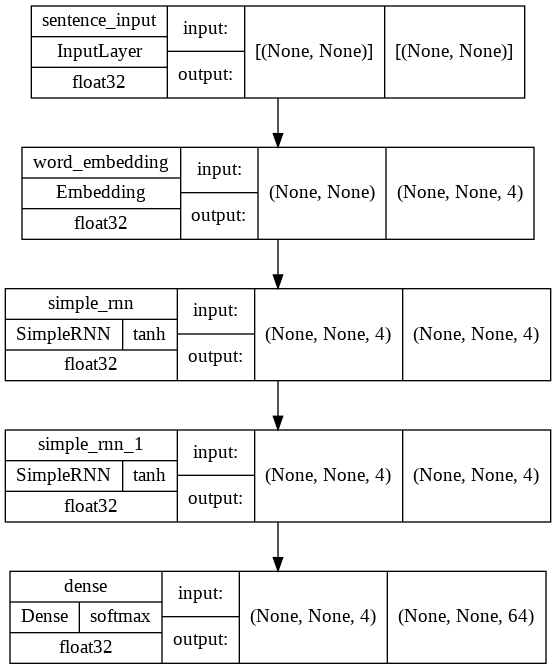

In [35]:
# model structure
tf.keras.utils.plot_model(model,show_shapes=True, show_dtype=True,show_layer_names=True,show_layer_activations=True)

In [36]:
# fitting the model
mc = ModelCheckpoint('/content/drive/MyDrive/AI-3/project/baseline.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=5)
history = model.fit(train_sentences_padded, train_tags_padded, validation_split = 0.2, epochs=50,callbacks=[mc,es], batch_size=1024)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 3.8488 - accuracy: 0.0090
Epoch 1: val_accuracy improved from -inf to 0.01854, saving model to /content/drive/MyDrive/AI-3/project/baseline.h5
8/8 [==============================] - 7s 217ms/step - loss: 3.8488 - accuracy: 0.0090 - val_loss: 3.8213 - val_accuracy: 0.0185
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 3.8001 - accuracy: 0.0241
Epoch 2: val_accuracy improved from 0.01854 to 0.02593, saving model to /content/drive/MyDrive/AI-3/project/baseline.h5
8/8 [==============================] - 1s 144ms/step - loss: 3.8001 - accuracy: 0.0241 - val_loss: 3.7671 - val_accuracy: 0.0259
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 3.7416 - accuracy: 0.0285
Epoch 3: val_accuracy improved from 0.02593 to 0.02685, saving model to /content/drive/MyDrive/AI-3/project/baseline.h5
8/8 [==============================] - 1s 147ms/step - loss: 3.7416 - accuracy: 0.0285 - val_loss: 3.7044 - v

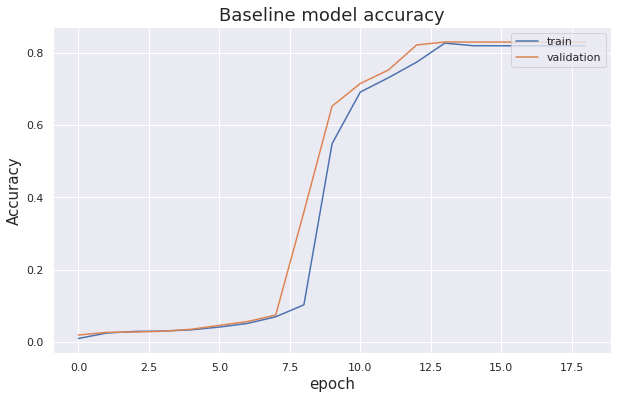

In [37]:
import seaborn as sns
sns.set()
# accuracy
fig = plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Baseline model accuracy', fontsize=18)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [38]:
# predicting on the test data
preds = model.predict(test_sentences_padded)

In [39]:
# using argmax to find the predictions
rec = []
for record in preds:
  word = []
  for words in record:
    word.append(np.argmax(np.array(words)))
  rec.append(word)

In [40]:
rec = np.array(rec)

In [41]:
unique, counts = np.unique(rec, return_counts=True)

from prettytable import PrettyTable
columns=['Predictions','Tag', 'Count']
mytable = PrettyTable()
mytable.add_column(columns[0], unique)
mytable.add_column(columns[1], tags.iloc[unique-1]['index'].values)
mytable.add_column(columns[2], counts)

print(mytable)

+-------------+-----+--------+
| Predictions | Tag | Count  |
+-------------+-----+--------+
|      63     |  O  | 119950 |
+-------------+-----+--------+


**From the above cell, we can see that almost all the predictions are 'O'. That's why the validation accuracy is fixed at around 83%. This is due to the imbalance in the dataset, around 83% in the validation set and 82% in the training set are "O"s. So, although the accuracy looks good enough, it's a very biased model. We ran this model many times, but the results didn't vary much.**

### **ELMO Model**

In [42]:
# Reference for ELMO: https://medium.com/analytics-vidhya/named-entity-recognition-using-deep-learning-elmo-embedding-bi-lstm-48295bc66cab
tf.keras.backend.clear_session()

# elmo model
sentence_input1 = tf.keras.Input(shape=(None,), name='sentence_input')

word_embedding = tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=30, 
                    name='word_embedding', mask_zero=True)
masked_embedding = word_embedding(sentence_input1)

lstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences=True))
hf_1 = lstm1(masked_embedding)

lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences=True))
hf = lstm2(hf_1)

hf_z = tf.keras.layers.add([hf, hf_1])

dense = tf.keras.layers.Dense(tags['index'].shape[0]+1, activation='softmax')
output = dense(hf_z)

model_2 = tf.keras.Model(inputs=sentence_input1, outputs=output, name='simpleRNN')
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = 'accuracy')

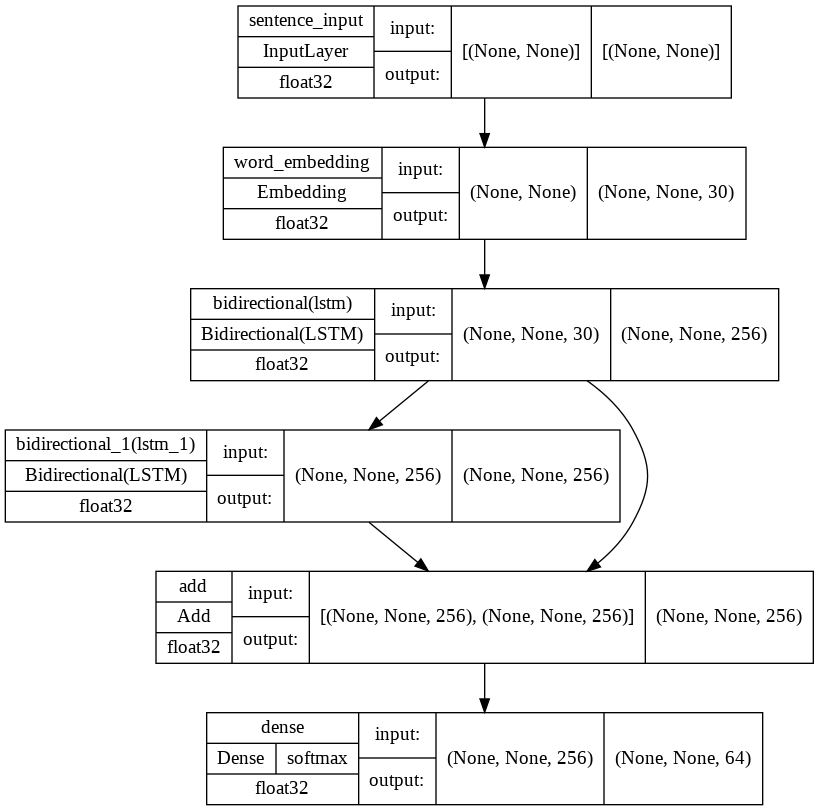

In [43]:
tf.keras.utils.plot_model(model_2,show_shapes=True, show_dtype=True,show_layer_names=True,show_layer_activations=True)

In [44]:
# fitting the model
mc = ModelCheckpoint('/content/drive/MyDrive/AI-3/project/elmo.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=15)
history2 = model_2.fit(train_sentences_padded, train_tags_padded, validation_split = 0.2, epochs=50,callbacks=[mc,es], batch_size=1024)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 3.4655 - accuracy: 0.7174
Epoch 1: val_accuracy improved from -inf to 0.83103, saving model to /content/drive/MyDrive/AI-3/project/elmo.h5
8/8 [==============================] - 21s 763ms/step - loss: 3.4655 - accuracy: 0.7174 - val_loss: 1.2887 - val_accuracy: 0.8310
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1.3639 - accuracy: 0.8208
Epoch 2: val_accuracy did not improve from 0.83103
8/8 [==============================] - 1s 111ms/step - loss: 1.3639 - accuracy: 0.8208 - val_loss: 1.0470 - val_accuracy: 0.8310
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1.0718 - accuracy: 0.8208
Epoch 3: val_accuracy did not improve from 0.83103
8/8 [==============================] - 1s 110ms/step - loss: 1.0718 - accuracy: 0.8208 - val_loss: 1.0498 - val_accuracy: 0.8310
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1.0246 - accuracy: 0.8208
Epoch 4: val_accuracy did not

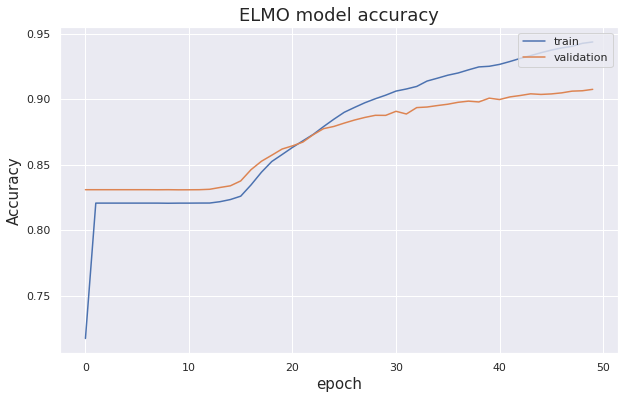

In [45]:
# accuracy
fig = plt.figure(figsize=(10,6))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('ELMO model accuracy', fontsize=18)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [46]:
# predicting on the test data
preds_elmo = model_2.predict(test_sentences_padded)

In [47]:
# using argmax to find the predictions
rec = []
for record in preds_elmo:
  word = []
  for words in record:
    word.append(np.argmax(np.array(words)))
  rec.append(word)

In [48]:
rec = np.array(rec)

In [49]:
tags.columns

Index(['index', 0], dtype='object')

In [50]:
unique, counts = np.unique(rec, return_counts=True)

from prettytable import PrettyTable
columns=['Predictions','Tag', 'Count']
mytable = PrettyTable()
mytable.add_column(columns[0], unique)
mytable.add_column(columns[1], tags.iloc[unique-1]['index'].values)
mytable.add_column(columns[2], counts)

print(mytable)

+-------------+---------------------+-------+
| Predictions |         Tag         | Count |
+-------------+---------------------+-------+
|      2      |  B-CelestialObject  |  422  |
|      5      |      B-Citation     |  1146 |
|      7      | B-ComputingFacility |   2   |
|      8      |      B-Database     |   1   |
|      9      |      B-Dataset      |   5   |
|      12     |     B-Fellowship    |   10  |
|      13     |      B-Formula      |  223  |
|      14     |       B-Grant       |  195  |
|      16     |     B-Instrument    |   1   |
|      17     |      B-Location     |   14  |
|      19     |       B-Model       |  234  |
|      21     |    B-Observatory    |   69  |
|      22     |    B-Organization   |  1235 |
|      23     |       B-Person      |  437  |
|      25     |      B-Software     |   64  |
|      26     |       B-Survey      |   20  |
|      28     |     B-Telescope     |  105  |
|      30     |        B-URL        |   1   |
|      31     |     B-Wavelength  

**From the above cell, we can see that this model works much better than the baseline model. It actually learns to predict rather than giving 'O' as output most of the time. The validation accuracy reaches around 90% in 50 epochs, and it follows the training accuracy upto a certain limit pretty well.**